# Домашнее задание 1

**Напишите на Python реализацию как минимум одного алгоритма на выбор: любая на выбор цветовая обработка, перевод в другое цветовое пространство или фильтрация. Изображение выберите самостоятельно.**

In [55]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import imageio

### Загрузка цветного изображения

In [56]:
img = imageio.imread('USOneDollar.png')
print(img.shape)

(1051, 1260, 4)


In [57]:
print(img[:5, :5, :])

[[[216 214 189 255]
  [215 213 188 255]
  [214 213 185 255]
  [215 211 184 255]
  [217 213 184 255]]

 [[219 218 190 255]
  [219 218 190 255]
  [220 216 189 255]
  [220 216 189 255]
  [220 216 187 255]]

 [[222 221 193 255]
  [225 221 194 255]
  [226 222 195 255]
  [226 222 193 255]
  [225 220 191 255]]

 [[224 220 193 255]
  [227 223 194 255]
  [229 225 196 255]
  [230 225 196 255]
  [228 223 193 255]]

 [[222 218 189 255]
  [226 222 193 255]
  [230 225 196 255]
  [231 226 196 255]
  [230 223 194 255]]]


### Визуализация цветного изображения

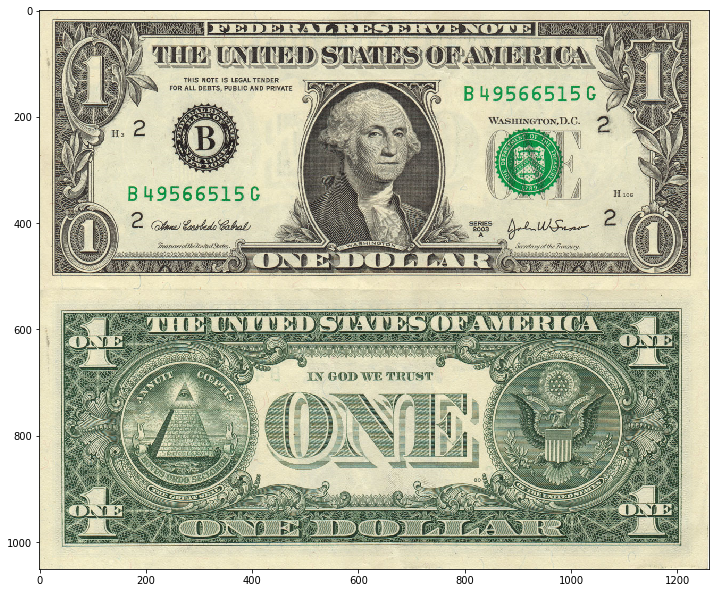

In [58]:
plt.figure(figsize=(12, 12))
plt.imshow(img)

### Реализация на Python алгоритма фильтрации самостоятельно.

**Размытье**

In [59]:
def my_median_filter(x):
    # Median blur
    return np.median(x)

In [60]:
win_size = (9, 9) # размер окна

out_img = np.zeros(
    (img.shape[0] - win_size[0] + 1,
     img.shape[1] - win_size[1] + 1), 
     dtype=np.float32)

for i in range(out_img.shape[0]):
    for j in range(out_img.shape[1]):
        x = img[i:i+win_size[0], j:j+win_size[1]]
        out_img[i,j] = my_median_filter(x)

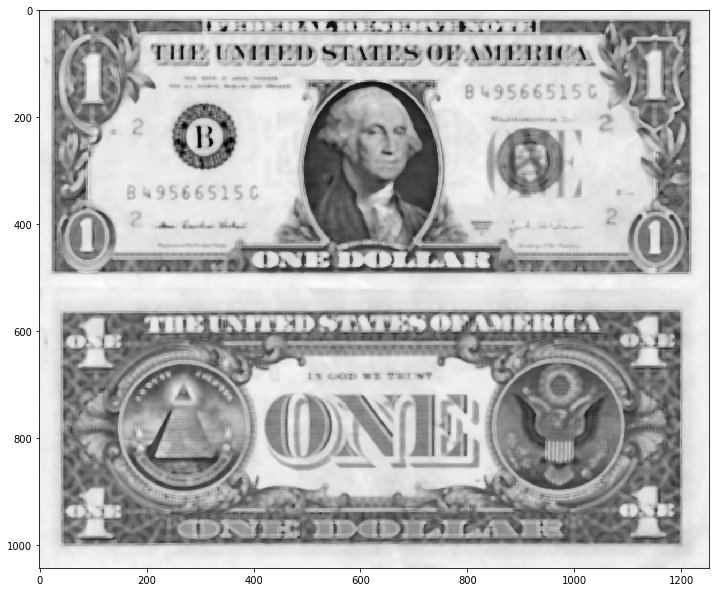

In [61]:
plt.figure(figsize=(12, 12))
plt.imshow(out_img, cmap='gray')

**Фильтрация по порогу**

In [62]:
img_threshold = img.astype(np.float32) / 255. # нормализовать в диапазоне от 0 до 1

In [63]:
threshold = 0.65 # порог бинаризации
img_bw = np.mean(img_threshold, axis=2)
img_bin = (img_bw > threshold).astype(np.uint8)

In [64]:
img_bin[:5, :5]

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

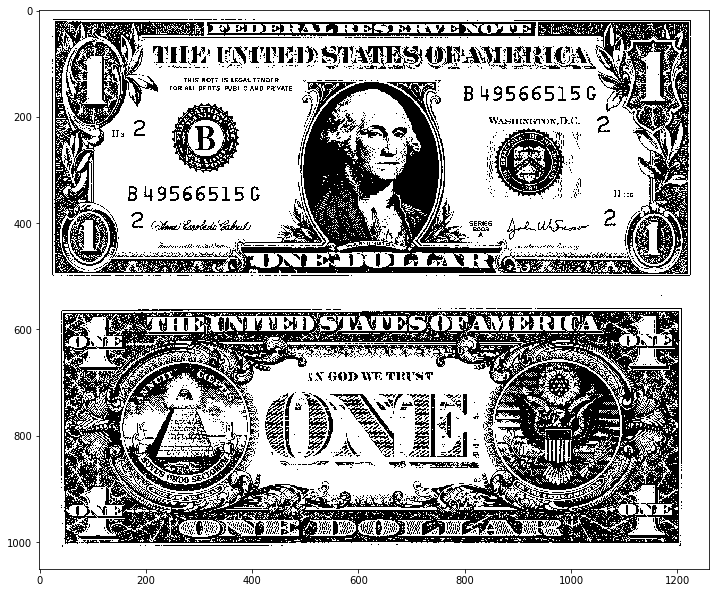

In [65]:
plt.figure(figsize=(12, 12))
plt.imshow(img_bin*255, cmap='gray')

Получается эффект "ксерокопирования" банкноты

**Фильтрация горизонтальных границ на изображении**

In [66]:
win_size = (3, 3)
w = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])

[[-1 -1 -1]
 [ 0  0  0]
 [ 1  1  1]]


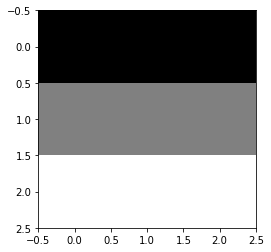

In [67]:
print(w)
plt.imshow(w, cmap='gray')

In [68]:
img_new = img[:,:,0].astype(np.float32) / 255.
print(img.shape)

(1051, 1260, 4)


In [69]:
%%time

out_img = np.zeros(
    (img_new.shape[0] - w.shape[0] + 1,
     img_new.shape[1] - w.shape[1] + 1), 
     dtype=np.float32)

for i in range(out_img.shape[0]):
    for j in range(out_img.shape[1]):
        x = img_new[i:i+w.shape[0], j:j+w.shape[1]]

        out_img[i,j] = np.sum(w * x)

Wall time: 44.1 s


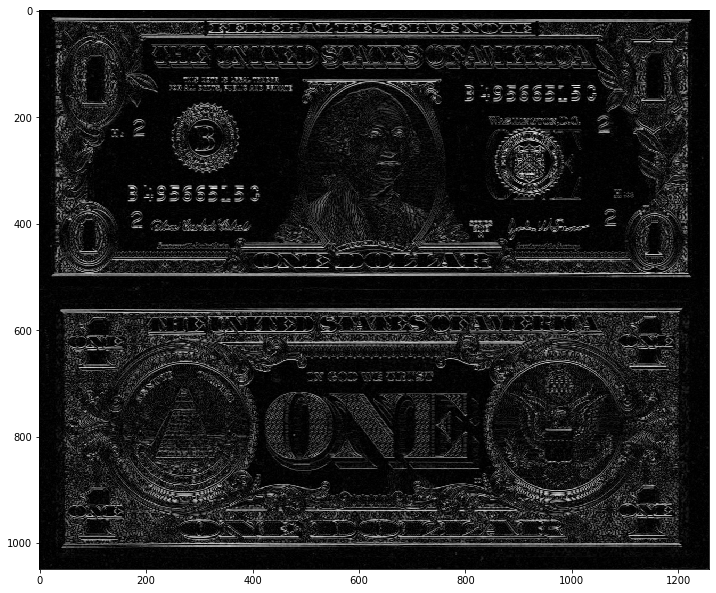

In [70]:
plt.figure(figsize=(12, 12))
plt.imshow(np.abs(out_img), cmap='gray')

**Фильтрация вертикальных границ на изображении**

In [71]:
win_size = (3, 3)
w = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])

[[-1  0  1]
 [-1  0  1]
 [-1  0  1]]


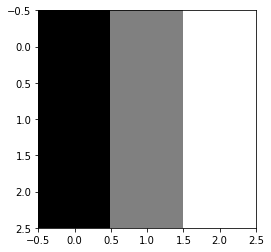

In [72]:
print(w)
plt.imshow(w, cmap='gray')

In [73]:
img_new = img[:,:,0].astype(np.float32) / 255.
print(img.shape)

(1051, 1260, 4)


In [74]:
%%time

out_img = np.zeros(
    (img_new.shape[0] - w.shape[0] + 1,
     img_new.shape[1] - w.shape[1] + 1), 
     dtype=np.float32)

for i in range(out_img.shape[0]):
    for j in range(out_img.shape[1]):
        x = img_new[i:i+w.shape[0], j:j+w.shape[1]]

        out_img[i,j] = np.sum(w * x)

Wall time: 46.2 s


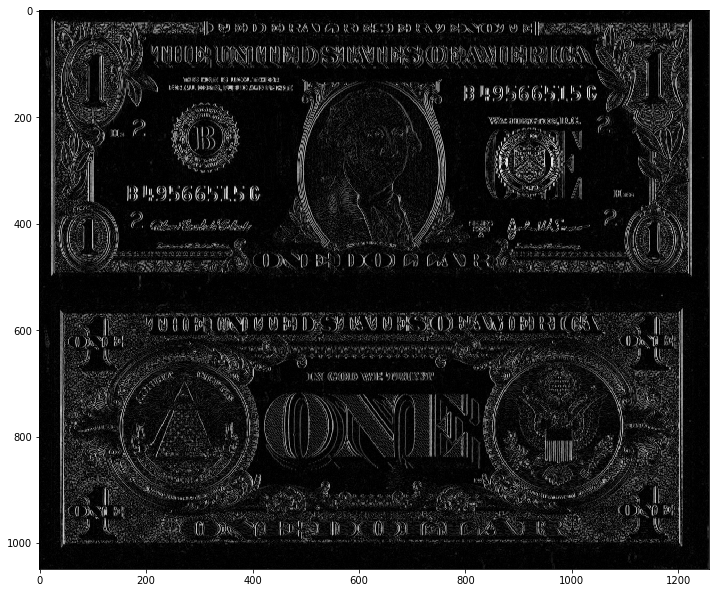

In [75]:
plt.figure(figsize=(12, 12))
plt.imshow(np.abs(out_img), cmap='gray')